In [5]:
# mnist_pca_project.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.datasets import mnist

In [7]:
# Load MNIST dataset from TensorFlow/Keras
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [8]:
# Flatten 28x28 images into 784-dimensional vectors
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')

In [9]:
# Normalize pixel values to [0, 1]
X_train_full /= 255.0
X_test /= 255.0

In [10]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [12]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [13]:
# Model before PCA
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_before_pca = accuracy_score(y_test, y_pred)

In [14]:
# Report before PCA
print("\nAccuracy before PCA: {:.2f}%".format(accuracy_before_pca * 100))
print("Classification Report (Before PCA):\n", classification_report(y_test, y_pred))


Accuracy before PCA: 96.73%
Classification Report (Before PCA):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [15]:
# Dimensionality reduction with PCA
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
# Model after PCA
clf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)

In [17]:
# Report after PCA
print("\nAccuracy after PCA: {:.2f}%".format(accuracy_after_pca * 100))
print("Classification Report (After PCA):\n", classification_report(y_test, y_pred_pca))


Accuracy after PCA: 93.39%
Classification Report (After PCA):
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.98      0.99      1135
           2       0.92      0.93      0.93      1032
           3       0.89      0.93      0.91      1010
           4       0.93      0.94      0.94       982
           5       0.94      0.89      0.91       892
           6       0.95      0.96      0.96       958
           7       0.92      0.93      0.92      1028
           8       0.92      0.90      0.91       974
           9       0.92      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



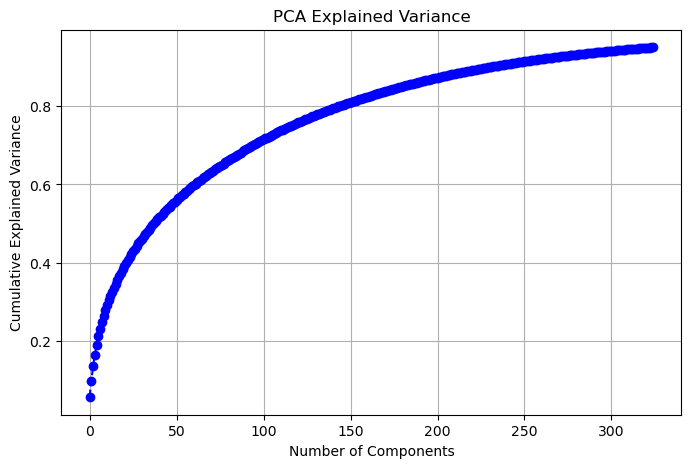

In [18]:
# Visualizing explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

In [19]:
# Conclusion
print("Dimensionality reduction reduced features from {} to {}.".format(X_train.shape[1], X_train_pca.shape[1]))
print("Accuracy improved: {:.2f}% -> {:.2f}%".format(accuracy_before_pca * 100, accuracy_after_pca * 100))

Dimensionality reduction reduced features from 784 to 325.
Accuracy improved: 96.73% -> 93.39%
